# Data Science en Entreprise

## API pôle emploi

Autorisation d’accès à l’api des offres d’emplois

Compte pole emploi :    
username : mohammed.didi@outlook.com    
password : Projet_Data1



In [55]:
import requests


def obtenir_token(client_id, client_secret):
    """
    Cette fonction obtient un token d'accès pour l'API de Pôle Emploi.
    """
    url_token = 'https://entreprise.pole-emploi.fr/connexion/oauth2/access_token?realm=/partenaire'
    auth_data = {
        'grant_type': 'client_credentials',
        'client_id': client_id,
        'client_secret': client_secret,
        'scope': 'api_offresdemploiv2 o2dsoffre'
    }
    headers = {'Content-Type': 'application/x-www-form-urlencoded'}

    response = requests.post(url_token, data=auth_data, headers=headers)

    if response.status_code != 200:
        raise Exception(f"Erreur lors de la requête : {response.text}")
    else:
        data = response.json()
        return data['access_token']
    
# Utilisation de la fonction
client_id = 'PAR_projetdata_29c785675807663802eabdf57858fc4e2ecd4eba4de8d05eee293bfdcacefae5'
client_secret = '8a48c4726bb2d33cafb7a636703a3b0ad70e4098b525063d2a99387a95a76b70'


In [56]:
import requests
from datetime import datetime
import pandas as pd
import json


def rechercher_offres(token, mot_cle, mois, annee, nb_offres=10):
    """
    Recherche les offres d'emploi dans le domaine des RH pour un mois et une année spécifiques.
    """
    url_offres = 'https://api.emploi-store.fr/partenaire/offresdemploi/v2/offres/search'
    headers = {'Authorization': f'Bearer {token}'}

    # Calculer les dates de début et de fin du mois de novembre
    debut_mois = f"{annee}-{mois:02d}-01T00:00:00Z"
    fin_mois = f"{annee}-{mois:02d}-30T00:00:00Z"  # Novembre a 30 jours

    params = {
        'motsCles': mot_cle,  # Mots-clés pour le domaine des Ressources Humaines
        'range': f'0-{nb_offres-1}',  # Les 10 premières offres
        'minCreationDate': debut_mois,
        'maxCreationDate': fin_mois
    }

    response = requests.get(url_offres, headers=headers, params=params)

    try:
        return response.json()
    except:
        raise Exception(f"Erreur lors de la requête : {response.json()}")



token = obtenir_token(client_id, client_secret)
offres_Data_novembre = rechercher_offres(token, 'Data', 11, 2023)  # Exemple pour novembre 2023
# json to dataframe
# jsoon to dataframe
df = pd.DataFrame.from_dict(offres_Data_novembre['resultats'])


In [61]:
from datetime import datetime, timedelta

def get_access_token():
    url = "https://entreprise.pole-emploi.fr/connexion/oauth2/access_token?realm=%2Fpartenaire"
    client_id = "PAR_projetdata_20dc94f3568457527fe4edda39e827c960f36708a61e6bc3b9e0bdd5c798091d"
    client_secret = "58278acf29c5d865bdc657b658ec037342ba4c889459d16c09045b5b5437986f"
    scope = "api_offresdemploiv2 application_PAR_projetdata_20dc94f3568457527fe4edda39e827c960f36708a61e6bc3b9e0bdd5c798091d o2dsoffre"
    grant_type = "client_credentials"

    headers = {
        "Content-Type": "application/x-www-form-urlencoded",
    }

    data = {
        "client_id": client_id,
        "client_secret": client_secret,
        "scope": scope,
        "grant_type": grant_type,
    }

    response = requests.post(url, headers=headers, data=data)
    return response.json().get("access_token")

def get_job_offers(access_token, key_word):
    url = "https://api.emploi-store.fr/partenaire/offresdemploi/v2/offres/search"
    params = {
        "motsCles": key_word,  
    }
    headers = {
        "Authorization": f"Bearer {access_token}",
        "Content-Type": "application/json",
    }

    response = requests.get(url, headers=headers, params=params)
    try :
        return response.json()
    except :
        pass

# Création du DataFrame vide
df = pd.DataFrame()

current_date = datetime.now()

# Boucle pour les 100 derniers jours
# Boucle pour les jours spécifiés (ici, 100 à 200 derniers jours)
"""
for day in range(901, 2001):
    # Calculer la date il y a 'day' jours
    target_date = current_date - timedelta(days=day)
    
    # Formatter la date dans le format attendu
    min_date = target_date.strftime("%Y-%m-%dT%H:%M:%SZ")
    max_date = (target_date + timedelta(days=1)).strftime("%Y-%m-%dT%H:%M:%SZ")

    # Obtenez le token d'accès
    access_token = get_access_token()

    # Récupérez les offres d'emploi
    job_offers = get_job_offers(access_token, min_date, max_date)

    # Vérifiez si job_offers est non nul et contient la clé "resultats"
    if job_offers and "resultats" in job_offers:
        # Ajoutez les offres d'emploi au DataFrame
        df = pd.concat([df, pd.json_normalize(job_offers["resultats"])])
    else:
        print(f"Aucune donnée trouvée ou erreur pour la date : {min_date}")

# Réinitialisez l'index du DataFrame"""
df.reset_index(drop=True, inplace=True)

# Affichez le DataFrame final
print(df)

Empty DataFrame
Columns: []
Index: []


In [64]:
sectors_keywords = {
    "Technologie": ["ingénieur logiciel", "développeur web", "scientifique de données", "cybersécurité", "administrateur réseau", "développeur mobile", "architecte système", "UI/UX designer", "analyste système", "ingénieur cloud"],
    "Santé": ["infirmier", "médecin", "assistant médical", "pharmacien", "dentiste", "psychologue", "chirurgien", "technicien de laboratoire", "radiologue", "anesthésiste"],
    "Énergie": ["énergie renouvelable", "ingénieur solaire", "technicien éolien", "ingénieur pétrolier", "technicien de maintenance", "ingénieur nucléaire", "consultant en énergie", "analyste en énergie", "gestionnaire de projet énergie", "technicien HVAC"],
    "Finance": ["comptable", "analyste financier", "banquier d'investissement", "contrôleur de gestion", "auditeur", "gestionnaire de fonds", "conseiller financier", "courtier", "analyste de crédit", "gestionnaire de risques"],
    "Secteurs Émergents": ["IA", "blockchain", "matériaux durables", "robotique", "biotechnologie", "véhicules autonomes", "énergie géothermique", "impression 3D", "nanotechnologie", "agriculture verticale"],
    "Enseignement": ["professeur", "conseiller pédagogique", "assistant d'éducation", "chercheur", "tuteur", "éducateur spécialisé", "formateur pour adultes", "coach de vie", "professeur de langue", "bibliothécaire"],
    "Construction": ["chef de chantier", "architecte", "ingénieur civil", "ouvrier", "technicien en bâtiment", "maçon", "charpentier", "électricien", "plombier", "peintre"],
    "Juridique": ["avocat", "notaire", "juriste", "greffier", "conseiller juridique", "assistant juridique", "procureur", "juge", "clerc de notaire", "huissier de justice"],
    "Marketing": ["chef de produit", "responsable marketing", "analyste marché", "chargé de communication", "social media manager", "concepteur-rédacteur", "directeur artistique", "planneur stratégique", "responsable SEO", "data analyst marketing"],
    "Vente": ["vendeur", "représentant commercial", "responsable des ventes", "chef de secteur", "conseiller clientèle", "manager de rayon", "négociateur B2B", "délégué pharmaceutique", "directeur de magasin", "chargé d'affaires"],
    "Logistique": ["logisticien", "chauffeur poids lourd", "responsable d'entrepôt", "agent d'exploitation", "coordinateur logistique", "préparateur de commandes", "gestionnaire de stocks", "agent de transit", "affréteur", "pilote de drone logistique"],
    "Agriculture": ["agronome", "exploitant agricole", "ouvrier agricole", "technicien agricole", "viticole", "paysagiste", "forestier", "aquaculteur", "conseiller en agriculture", "ingénieur agroalimentaire"],
    "Art et Culture": ["artiste", "conservateur de musée", "restaurateur d'art", "archéologue", "scénographe", "critique d'art", "directeur de galerie", "bibliothécaire", "historien de l'art", "régisseur d'œuvres"],
    "Tourisme": ["guide touristique", "agent de voyage", "réceptionniste", "chef de brigade", "animateur touristique", "gestionnaire de site touristique", "consultant en tourisme", "agent de réservation", "directeur d'hôtel", "organisateur d'événements"],
    "Restauration": ["chef de cuisine", "serveur", "barman", "pâtissier", "sommelier", "maître d'hôtel", "cuisinier", "boulanger", "commis de cuisine", "gérant de restaurant"],
    "Ingénierie": ["ingénieur mécanique", "ingénieur électronique", "ingénieur aéronautique", "ingénieur génie civil", "ingénieur en matériaux", "ingénieur électrique", "ingénieur biomédical", "ingénieur en robotique", "ingénieur environnemental", "ingénieur chimiste"],
    "Informatique et Télécommunications": ["technicien support", "administrateur système", "ingénieur télécom", "développeur de logiciels", "analyste de sécurité informatique", "ingénieur réseau", "architecte IT", "spécialiste en base de données", "consultant en systèmes d'information", "spécialiste en cloud computing"]
}


# Initialize an empty DataFrame
df = pd.DataFrame()

for sector, keywords in sectors_keywords.items():
    for key_word in keywords:
        access_token = get_access_token()
        job_offers = get_job_offers(access_token, key_word)

        if job_offers and "resultats" in job_offers:
            df_temp = pd.json_normalize(job_offers["resultats"])
            df_temp['Secteur'] = sector  # Add sector information to each job offer in French
            df = pd.concat([df, df_temp])
        else:
            print(f"Pas de données trouvées ou erreur pour le mot-clé : {key_word}")

df.reset_index(drop=True, inplace=True)

Pas de données trouvées ou erreur pour le mot-clé : matériaux durables
Pas de données trouvées ou erreur pour le mot-clé : agriculture verticale
Pas de données trouvées ou erreur pour le mot-clé : pilote de drone logistique
Pas de données trouvées ou erreur pour le mot-clé : restaurateur d'art
Pas de données trouvées ou erreur pour le mot-clé : scénographe
Pas de données trouvées ou erreur pour le mot-clé : spécialiste en cloud computing


In [65]:
df

,id,intitule,description,dateCreation,dateActualisation,romeCode,romeLibelle,appellationlibelle,typeContrat,typeContratLibelle,...,entreprise.logo,complementExercice,experienceCommentaire,contact.coordonnees2,contact.coordonnees3,agence.courriel,origineOffre.partenaires,Secteur,conditionExercice,contact.telephone
0,168WJXD,Ingénieur Logiciel C++ -F/H (H/F),Description du poste\n\nNous recrutons un/une ...,2024-02-05T11:54:45.000Z,2024-02-06T08:33:32.000Z,M1805,Études et développement informatique,Ingénieur / Ingénieure d'étude logiciel inform...,CDI,Contrat à durée indéterminée,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Technologie,NaN,NaN
1,168VJSG,Ingénieur / Ingénieure développement logiciel ...,Vous souhaitez rejoindre une industrie françai...,2024-02-02T17:54:20.000Z,2024-02-06T09:44:21.000Z,M1805,Études et développement informatique,Ingénieur / Ingénieure développement logiciel ...,CDI,Contrat à durée indéterminée,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Technologie,NaN,NaN
2,168VFKW,Ingénieur en développement logiciel embarqué (...,"Otonomy Aviation, est un concepteur et fabrica...",2024-02-02T16:43:00.000Z,2024-02-06T12:20:26.000Z,H1206,"Management et ingénierie études, recherche et ...",Ingénieur(e) d'études-recherche-développement ...,CDI,Contrat à durée indéterminée,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Technologie,NaN,NaN
3,168TYCH,Ingénieur / Ingénieure développement logiciel ...,EVISTEL est une PME high tech dont le siège pr...,2024-02-02T15:12:21.000Z,2024-02-06T11:27:16.000Z,M1805,Études et développement informatique,Ingénieur / Ingénieure développement logiciel ...,CDI,Contrat à durée indéterminée,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Technologie,NaN,NaN
4,168TWPQ,Ingénieur développement logiciel bancs de test...,"Nous recherchons pour notre client, un groupe ...",2024-02-02T14:51:36.000Z,2024-02-02T14:51:37.000Z,M1805,Études et développement informatique,Ingénieur / Ingénieure logiciel informatique,CDI,Contrat à durée indéterminée,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Technologie,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18678,167CNRK,Consultant EBP (H/F),Mission et activités principales :\n- Aide à l...,2024-01-04T09:49:49.000Z,2024-02-05T18:47:13.000Z,M1806,Conseil et maîtrise d'ouvrage en systèmes d'in...,Consultant / Consultante informatique,CDD,Contrat à durée déterminée - 4 Mois,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Informatique et Télécommunications,NaN,NaN
18679,167BWDF,Reconversion Consultant(e) SAP - Lille (H/F),Votre futur environnement de travail :\n\nVous...,2024-01-03T15:53:33.000Z,2024-02-06T10:27:42.000Z,M1806,Conseil et maîtrise d'ouvrage en systèmes d'in...,Consultant / Consultante ERP - Enterprise Reso...,CDI,Contrat à durée indéterminée,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Informatique et Télécommunications,NaN,NaN
18680,167BTDY,Consultant(e) Fonctionnel IFS H/F (33) (H/F),Notre client recherche un(e)\nConsultant(e) Fo...,2024-01-03T15:16:44.000Z,2024-02-06T10:27:58.000Z,M1806,Conseil et maîtrise d'ouvrage en systèmes d'in...,Consultant / Consultante ERP - Enterprise Reso...,CDI,Contrat à durée indéterminée,...,https://entreprise.pole-emploi.fr/static/img/l...,NaN,NaN,12200 VILLEFRANCHE DE ROUERGUE,"Pour postuler, utiliser le lien suivant : http...","Pour postuler, utiliser le lien suivant : http...",NaN,Informatique et Télécommunications,NaN,NaN
18681,166SWQZ,Consultant.e Microsoft 365 expérimenté (H/F),"Si vous recherchez les règles strictes, carrée...",2023-12-22T16:18:49.000Z,2024-02-01T11:52:53.000Z,M1806,Conseil et maîtrise d'ouvrage en systèmes d'in...,Consultant / Consultante informatique,CDI,Contrat à durée indéterminée,...,https://entreprise.pole-emploi.fr/static/img/l...,NaN,NaN,NaN,NaN,NaN,NaN,Informatique et Télécommunications,NaN,NaN


In [34]:
df.columns

Index([], dtype='object')

In [35]:
# save to csv in ../data

#df.to_csv('../data/offres_900_2000.csv', index=False)


In [36]:
import pandas as pd
import os
"""

# Define the path to the directory containing your CSV files
directory_path = "../data"

# List all CSV files in the directory
csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

# Sort the list of csv files to maintain the order
csv_files.sort()

# Create an empty DataFrame to concatenate your CSV data
concatenated_df = pd.DataFrame()

# Loop over the list of csv files
for file in csv_files:
    # Construct the full path to the csv file
    file_path = os.path.join(directory_path, file)
    
    # Read the csv file and append it to the concatenated DataFrame
    df = pd.read_csv(file_path)
    concatenated_df = pd.concat([concatenated_df, df], ignore_index=True)

# Reset the index of the concatenated DataFrame
concatenated_df.reset_index(drop=True, inplace=True)

# Optionally, save the concatenated data to a new CSV file
concatenated_df.to_csv('../data/concatenated_offers.csv', index=False)

# Display the concatenated DataFrame
print(concatenated_df)"""


'\n\n# Define the path to the directory containing your CSV files\ndirectory_path = "../data"\n\n# List all CSV files in the directory\ncsv_files = [file for file in os.listdir(directory_path) if file.endswith(\'.csv\')]\n\n# Sort the list of csv files to maintain the order\ncsv_files.sort()\n\n# Create an empty DataFrame to concatenate your CSV data\nconcatenated_df = pd.DataFrame()\n\n# Loop over the list of csv files\nfor file in csv_files:\n    # Construct the full path to the csv file\n    file_path = os.path.join(directory_path, file)\n    \n    # Read the csv file and append it to the concatenated DataFrame\n    df = pd.read_csv(file_path)\n    concatenated_df = pd.concat([concatenated_df, df], ignore_index=True)\n\n# Reset the index of the concatenated DataFrame\nconcatenated_df.reset_index(drop=True, inplace=True)\n\n# Optionally, save the concatenated data to a new CSV file\nconcatenated_df.to_csv(\'../data/concatenated_offers.csv\', index=False)\n\n# Display the concatenated

In [37]:
concatenated_df = pd.read_csv('../data/concatenated_offers.csv')

c:\Users\Moham\AppData\Local\Programs\PythonCodingPack\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (21,39) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [38]:
concatenated_df.head()

,id,intitule,description,dateCreation,dateActualisation,romeCode,romeLibelle,appellationlibelle,typeContrat,typeContratLibelle,...,contact.coordonnees2,contact.coordonnees3,agence.courriel,salaire.complement2,entreprise.logo,contact.urlPostulation,contact.telephone,origineOffre.partenaires,conditionExercice,agence.telephone
0,162RQFM,Technicien / Technicienne en mesures physiques...,Dans le cadre du développement de notre activi...,2023-10-04T10:50:29.000Z,2024-01-10T14:56:27.000Z,H1210,"Intervention technique en études, recherche et...",Technicien / Technicienne en mesures physiques...,CDI,Contrat à durée indéterminée,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,162RQCS,Agent / Agent (e) d'entretien des bâtiments et...,Recrute en urgence pour une prise de poste imm...,2023-10-04T10:49:33.000Z,2024-01-03T12:03:39.000Z,I1203,Maintenance des bâtiments et des locaux,Agent/Agente d'entretien des bâtiments et espa...,CDD,Contrat à durée déterminée - 2 Mois,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,162RQBK,Aide-soignant / Aide-soignante (H/F) ou AES de...,Vos missions :\n- Vous contribuez à la qualité...,2023-10-04T10:48:44.000Z,2024-01-08T16:08:48.000Z,J1501,"Soins d'hygiène, de confort du patient",Aide-soignant / Aide-soignante,CDI,Contrat à durée indéterminée,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,162RPNJ,Ambulancier Diplômé (H/F),Nous recrutons un ambulancier.\nVous réaliser...,2023-10-04T10:41:05.000Z,2023-12-19T11:22:23.000Z,J1305,Conduite de véhicules sanitaires,Ambulancier / Ambulancière,CDI,Contrat à durée indéterminée,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,162RPHL,Dessinateur / Dessinatrice du bâtiment,Nous recherchons un/e dessinateur/dessinatrice...,2023-10-04T10:37:11.000Z,2024-01-11T09:24:18.000Z,F1104,Dessin BTP et paysage,Dessinateur / Dessinatrice du bâtiment,CDI,Contrat à durée indéterminée,...,11300 LIMOUX,"Pour postuler, utiliser le lien suivant : http...","Pour postuler, utiliser le lien suivant : http...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


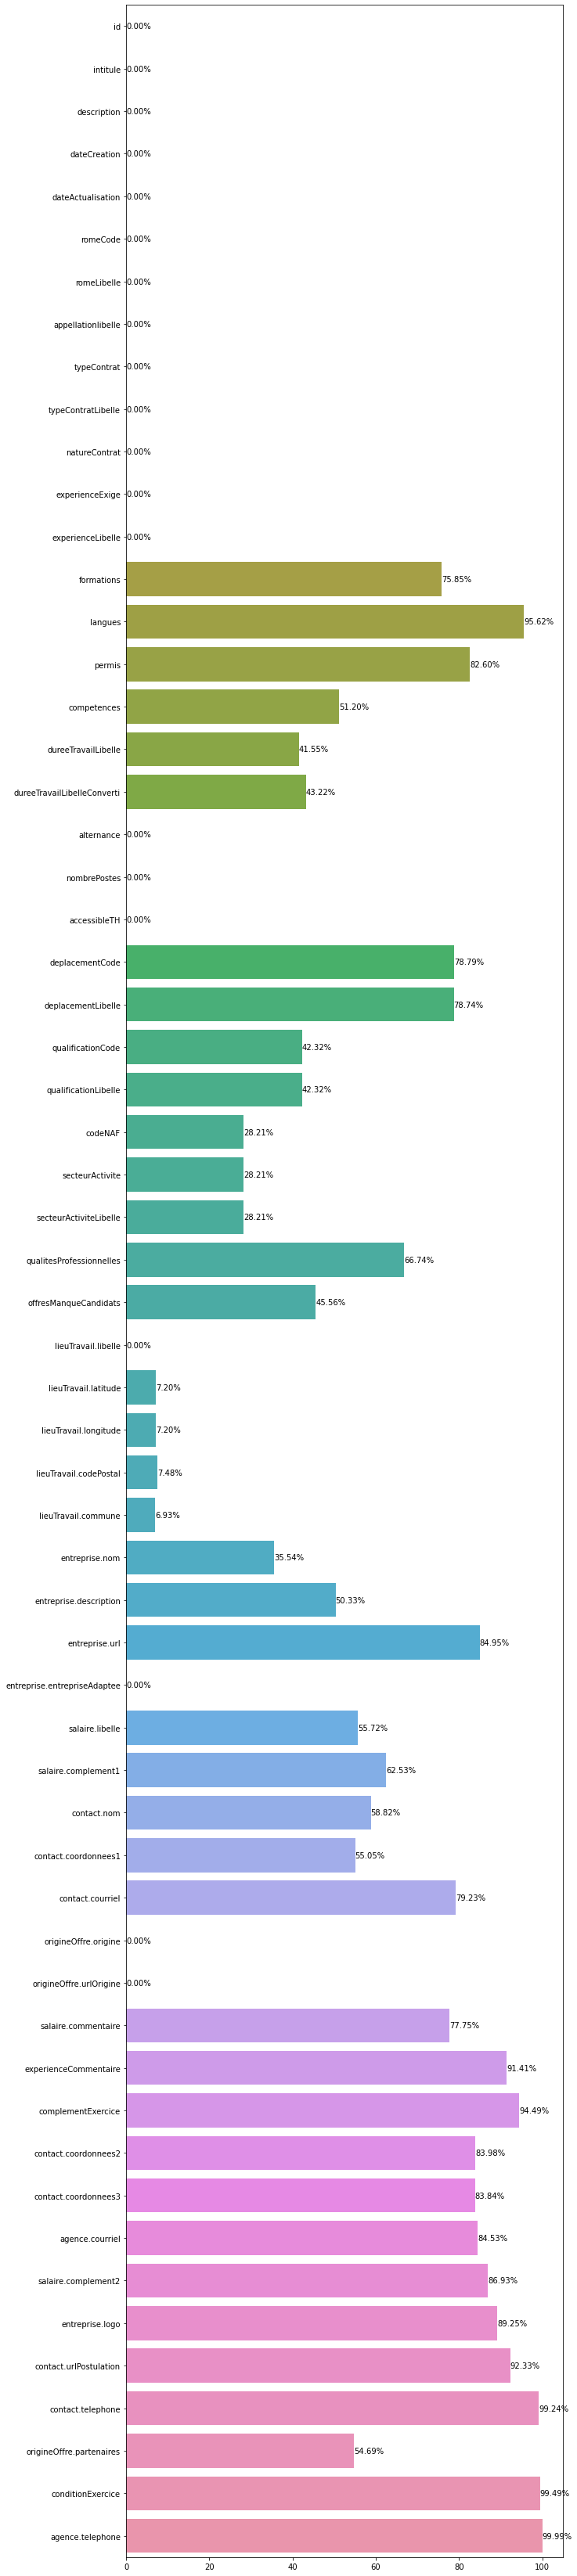

In [39]:
cols = concatenated_df.columns

# Display the percentage of missing values for each column
missing_percentage = concatenated_df.isnull().mean() * 100 

# plot the missing percentage
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 60))
sns.barplot(x=missing_percentage, y=missing_percentage.index)

# add values on top of the bars
for index, value in enumerate(missing_percentage):
    plt.text(value, index, f'{value:.2f}%', va='center')


<AxesSubplot:xlabel='typeContrat', ylabel='count'>

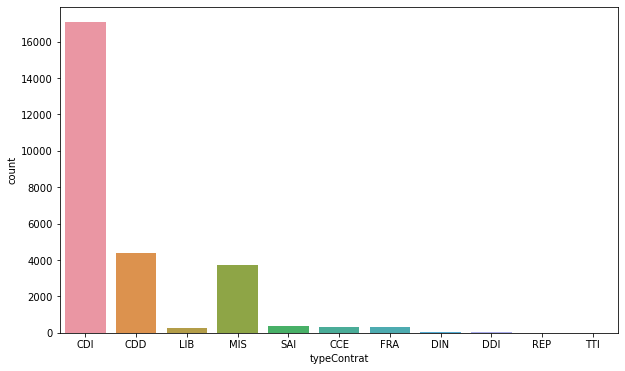

In [40]:
# all type of contract values
concatenated_df['typeContrat'].value_counts()

# plot the distribution of the 'typeContrat' column
plt.figure(figsize=(10, 6))
sns.countplot(data=concatenated_df, x='typeContrat')


<AxesSubplot:xlabel='experienceExige', ylabel='count'>

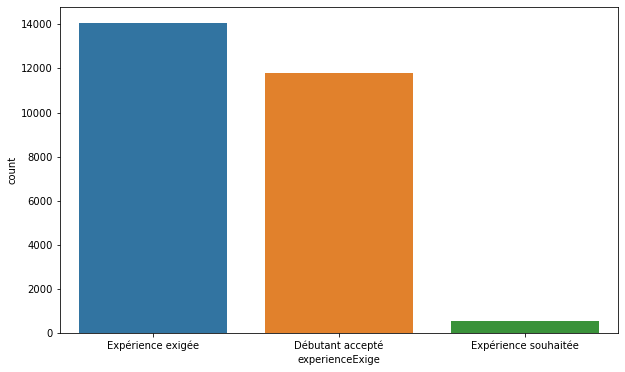

In [42]:
# experience exigee

"""
    D -> Débutant accepté
    S -> Expérience souhaitée
    E -> Expérience exigée

"""
concatenated_df['experienceExige'].value_counts()



correspondance = {
    'D': 'Débutant accepté',
    'S': 'Expérience souhaitée',
    'E': 'Expérience exigée'
}

# Replace the values in the 'experienceExige' column
concatenated_df['experienceExige'] = concatenated_df['experienceExige'].map(correspondance)

# plot the distribution of the 'experienceExige' column
plt.figure(figsize=(10, 6))
sns.countplot(data=concatenated_df, x='experienceExige')

<AxesSubplot:xlabel='count', ylabel='secteurActiviteLibelle'>

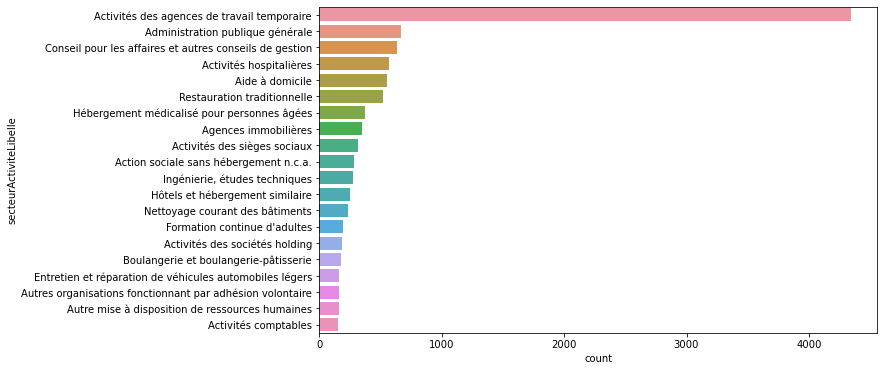

In [48]:
# grandDomaine values
concatenated_df['secteurActiviteLibelle'].value_counts()

top_secteur = concatenated_df['secteurActiviteLibelle'].value_counts().head(20)

# plot the distribution of the 'secteurActiviteLibelle' column
plt.figure(figsize=(10, 6))
sns.countplot(data=concatenated_df, y='secteurActiviteLibelle', order=top_secteur.index)

In [51]:
# avrage salaire
concatenated_df['salaire.libelle'].value_counts()

Horaire de 11,65 Euros                                  457
Horaire de 11,52 Euros                                  285
Horaire de 11,65 Euros sur 12 mois                      244
Annuel de                                               240
Mensuel de 1833,00 Euros à 2250,00 Euros sur 12 mois    133
                                                       ... 
Mensuel de 1764,00 Euros à 264600,00 Euros                1
Mensuel de 2400 Euros à 3200 Euros sur 12 mois            1
Mensuel de 1931,38 Euros sur 12 mois                      1
Mensuel de 3000,00 Euros à 6000,00 Euros sur 12 mois      1
Mensuel de 3666,00 Euros sur 12 mois                      1
Name: salaire.libelle, Length: 4171, dtype: int64

KeyError: "['salaire'] not in index"